# Estudos sobre SQL x Pandas SQL

## 1. Introdução:

<img src = "https://cdn.filestackcontent.com/GgTFAbNTtiA09pWpwLAz" width="350" align=left> 

<br>

<img src = "https://www.kdnuggets.com/wp-content/uploads/c_sql_pandas_pandasql_5.png"  width="350" align = right>

Neste notebook vai ser abordado uma análise de dados (EDA) utilizando Pyhton (pandas) e PandaSQL (uma biblioteca que utiliza como backend o SQLite), mostrando as diferentes linhas de códigos entre elas as quais acabam chegando ao mesmo resultado!!

Para isto, será utilizado o banco de dados sobre Comportamento do Consumidor e seus hábitos de compras da plataforma Kaggle (www.kaggle.com), disponível para download aqui: *https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset?select=shopping_trends.csv*

A motivação desta análise consistiu em entender quais são os principais produtos comprados pelo consumidor, **buscando, com isso, nortear estratégias de marketings para as marcas e produtos, visando um aumento nas vendas e em sua receita!**

Para isso, será buscado responder algumas perguntas de negócios:

    - Qual é a distribuição demográfica dos clientes em termos de idade e gênero?
    
    - Os usuários masculinos costumam gastar mais em relação aos femininos?
    
    - Qual é o item mais comprado em cada categoria entre os diferentes gêneros dos usuários?
    
    - Há uma tendência específica de cor e de tipo de itens nas compras em relação ao tipo de Coleção?    
 
    - Os clientes que usam códigos promocionais têm maior propensão à assinatura?
    
    - Os clientes que usam códigos promocionais tendem a gastar mais?
    
    - Qual a predileção de produtos comprados pelos jovens (entre 18 e 25 anos) em relação aos adultos (maior que 25 anos)? Esta predileção varia em relação ao gênero?
    
    - Qual é o perfil de compra dos usuários não assinantes em relação àqueles que são assinantes? 



O dataset possui as seguintes colunas:

**Customer ID**:O identificador de cada usuário.

**Age**: A idade do usuário.

**Gender**: O gênero do usuário.

**Item Purchased**: O produto específico comprado.

**Category**: A categoria ou o tipo do departamento que o produto faz parte.

**Purchase Amount (USD)**: O valor do produto.

**Location**: Estado onde ocorreu a compra do produto.

**Size**: O tamanho ou manequim do produto.

**Color**: A variante de cor do produto.

**Season**: A coleção do produto.

**Review Rating**: O valor de satisfação do cliente em relação ao produto.

**Subscription Status**: A opção do cliente por um serviço de assinatura (sim/não).

**Shipping Type**: Tipo de entrega do produto.

**Discount Applied**: Aplicação de desconto na compra do produto (sim/não).

**Promo Code Used**: Aplicação de um código promocional (sim/não).

**Previous Purchases**: Informa o número de vezes que o usuário comprou algo na loja.

**Payment Method**: Forma de pagamento realizada na compra do produto.

**Frequency of Purchases**: Indica a frequencia do usuário na compra de produtos.

## 2. Análise Inicial de dados:

### Importação das bibliotecas

In [ ]:
import pandas as pd
import os
import numpy as np

#%pip install pandasql
import pandasql as ps

import warnings
warnings.filterwarnings("ignore")

### Leitura do dataset

In [ ]:
path = (r'C:\Users\maced\Desktop\Mentoria Anwar\Portifólio\Projeto_shopping')

os.chdir(path)

os.listdir()


In [ ]:
# Leitura dos datasets
df = pd.read_csv('shopping_behavior_updated.csv')

**Com o intuito de aplicar os conhecimentos de SQL em tabelas relacionais, por meio do Pandasql, irei dividir o dataframe a cima em dois resguardando a coluna "Costumer ID"!:** 

    - df_prod 
    
    - df_info 

In [ ]:
df.columns

In [ ]:
df_prod = df[['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category','Purchase Amount (USD)']]

df_info = df[['Customer ID','Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases']]

### Exploração dos datasets

In [ ]:
df_prod.head()

In [ ]:
print(f"O dataset apresenta {df_prod.shape[0]} linhas e {df_prod.shape[1]} colunas!")

In [ ]:
df_prod.info()

    - O dataframe não apresenta valores nulos a serem tratados!

In [ ]:
df_info.head()

In [ ]:

print(f"O dataset apresenta {df_info.shape[0]} linhas e {df_info.shape[1]} colunas!")

In [ ]:
df_info.info()

    - O dataframe não apresenta valores nulos a serem tratados!

### Tratamento dos dados:

#### Renomear as colunas do DF: 
    - Substituir os espaços vazios entre o nome das variáveis por '_' para facilitar a leitura das colunas:

In [ ]:
df_prod.columns = [coluna.replace(' ', '_') for coluna in df_prod.columns.values.tolist()]
df_prod.columns

In [ ]:
df_info.columns = [coluna.replace(' ', '_') for coluna in df_info.columns.values.tolist()]
df_info.columns

In [ ]:
df_prod.head(10)

In [ ]:
df_info.head(10)

#### Criação de duas cópias do dataframe:
    df_info_pandas = dataframe utilizado para aplicar os códigos em Pandas
    df_prod_pandas = dataframe utilizado para aplicar os códigos em Pandas
    
    
    df_info = dataframe utilizado para aplicar os códigos em SQL
    df_prod = dataframe utilizado para aplicar os códigos em SQL

In [ ]:
df_info_pandas = df_info.copy()

df_info_pandas.head(10)

In [ ]:
df_prod_pandas = df_prod.copy()

df_prod_pandas.head(10)

In [ ]:
df_info.head(10)

In [ ]:
df_prod.head(10)

A seguir será realizado uma comparação dos comandos entre o Pandas x SQL que chegam ao mesmo objetivo!

####  Modificação dos niveis da variável "Frequency_of_Purchases":

 **Código em Pandas:**

In [ ]:
df_info_pandas['Frequency_of_Purchases'].unique()

Fortnightly = quinzenal

Weekly = semanal

Annually = anual


Quarterly = trimestral


Bi-Weekly = duas vezes por semana


Monthly = mensalmente


Every 3 Months = a cada tres meses

In [ ]:
df_info_pandas["Frequency_of_Purchases"] = df_info_pandas["Frequency_of_Purchases"].map({'Fortnightly' : 'Quinzenal', 
                                        'Weekly' : 'Semanalmente', 'Annually' : 'Anualmente',
     'Quarterly' : 'Trimestralmente', 'Bi-Weekly' : 'Duas vezes por semana',
     'Monthly' : 'Mensalmente', 'Every 3 Months' : 'A cada tres meses'})

df_info_pandas['Frequency_of_Purchases'].unique()

**Código em SQL:**

In [ ]:
query_00 = """
SELECT
    DISTINCT Frequency_of_Purchases
FROM df_info
"""

ps.sqldf(query_00)


In [ ]:
query_01 = """
SELECT 
    CASE 
        WHEN df_info.Frequency_of_Purchases = 'Fortnightly' THEN 'Quinzenal'
        WHEN df_info.Frequency_of_Purchases = 'Weekly' THEN 'Semanalmente'
        WHEN df_info.Frequency_of_Purchases = 'Annually' THEN 'Anualmente'
        WHEN df_info.Frequency_of_Purchases = 'Quarterly' THEN 'Trimestralmente'
        WHEN df_info.Frequency_of_Purchases = 'Bi-Weekly' THEN "Duas vezes por semana"
        WHEN df_info.Frequency_of_Purchases = 'Monthly' THEN 'Mensalmente'
        WHEN df_info.Frequency_of_Purchases = 'Every 3 Months' THEN 'A cada tres meses'
        END AS Frequency_of_Purchases
FROM df_info
"""
ps.sqldf(query_01)

####  União de dois dataframes: baseado na coluna 'Customer_ID'

**Código em Pandas**

In [ ]:
df_users_pandas = pd.merge(df_prod_pandas, df_info_pandas, how = 'inner', on = 'Customer_ID')

df_users_pandas.head(10)

**Código em SQL**

In [ ]:
query = """ 
SELECT df_info.*,
       df_prod.Age,
       df_prod.Gender,
       df_prod.Item_Purchased,
       df_prod.Category,
       df_prod.'Purchase_Amount_(USD)'
FROM df_prod
INNER JOIN df_info
ON df_prod.Customer_ID = df_info.Customer_ID
"""
ps.sqldf(query)

## 3. Análise Univariada:

### 3.1 Qual a distribuição da idade dos usuários?

**Código em Pandas:**

In [ ]:
df_users_pandas[['Age']].describe().T.rename(columns={'count' : 'Quantidade de usuários',
                                               'mean' : 'Média',
                                               'std' : 'Desvio Padrão',
                                               'min' : 'Valor mínimo',
                                               'max' : 'Valor máximo'})

**Código em SQL:**

In [ ]:
df_query = """SELECT COUNT(Age) as 'Quantidade de usuários', 
                     AVG(Age) as 'Média',
                     MIN(Age) as 'Valor mínimo', 
                     MAX(Age) as 'Valor máximo' 
              FROM df_prod """


ps.sqldf(df_query)

- A média de idade dos usuários é de 44 anos! 
    

####
    
- Além disto, os dados mostram que o valor do primeiro quartil ou percentil 25 (25%) é 31 anos, ou seja, cerca de 25% dos usuários possuem idade até 31 anos. E o valor do terceiro quartil ou percentil 75 é 57, ou seja, cerca de 75% dos usuários presente no banco de dados possuem até 57 anos.

_______________

### 3.2 Qual a porcentagem de homens e mulheres?

**Código em Pandas:**

In [ ]:
(df_users_pandas['Gender'].value_counts(1)*100).reset_index().rename(columns={'index' : 'Gênero', 
                                                                              'Gender' :"Porcentagem (%)"}) 

**Código em SQL:**

In [ ]:
df_query = """
SELECT 
    Gender as 'Gênero',
   (COUNT(Gender)*100 / (SELECT COUNT(*) FROM df_prod)) as 'Porcentagem (%)'
FROM df_prod
GROUP BY Gênero /* Pode-se usar também o valor 1: que remete a numeração da posição da coluna: 1 = coluna 1(Gender)*/
ORDER BY Gênero DESC

"""


ps.sqldf(df_query)

- Existem mais usuários homens do que mulheres, sendo os homens representando mais da metade de todos os usuários!

_______________

### 3.3 Quais são os item mais comprados?

**Código em Pandas:**

In [ ]:
df_users_pandas['Item_Purchased'].value_counts().reset_index().rename(columns={'Item_Purchased' : 'Quantidade de itens',
                                                                              'index' : 'Itens comprados'}).\
sort_values(by='Quantidade de itens', ascending=False)

**Código em SQL:**

In [ ]:
df_query1 = """
SELECT 
    Item_Purchased as 'Itens comprados',
    COUNT(*) as 'Quantidade de itens'
FROM df_prod
GROUP BY "Itens comprados"
ORDER BY "Quantidade de itens" DESC

"""

ps.sqldf(df_query1)

- Os principais itens mais comprados são Blusas, Jóias e Calças com quantitativos iguais, seguidos por Camisetas e Vestidos!

<j>

- Enquanto que Lucas e Jeans são os menos comprados!   

_______________

### 3.4 Qual categoria de item mais comprada?

**Código em Pandas:**

In [ ]:
df_users_pandas['Category'].value_counts().reset_index().rename(columns={'Category' : 'Categoria do Item',
                                                                         'count' :'Quantidade de itens'}).\
sort_values(by='Quantidade de itens',ascending=False)

**Código em SQL:**

In [ ]:
df_query2 = """
SELECT Category AS 'Categoria do Item',
       COUNT(*) AS 'Quantidade de itens'
FROM df_prod
GROUP BY "Categoria do Item"
ORDER BY "Quantidade de itens" DESC

"""
ps.sqldf(df_query2)

- Os itens mais comprados pelos usuários pertencem a categoria de Vestuários e Acessários

_______________

### 3.5 Qual a média de gastos nos produtos pelos usuários?


**Código em Pandas:**

In [ ]:
df_users_pandas[["Purchase_Amount_(USD)"]].describe().T.rename(columns={'count' : 'Quantidade de usuários',
                                               'mean' : "Média (USD)",
                                               'std' : 'Desvio Padrão',
                                               'min' : 'Valor mínimo (USD)',
                                               'max' : 'Valor máximo (USD)'})

**Código em SQL:**

In [ ]:
df_query3 = """
SELECT COUNT('Purchase_Amount_(USD)') as 'Quantidade de usuários',
       MIN("Purchase_Amount_(USD)") as 'Valor minimo (USD)',
       AVG("Purchase_Amount_(USD)") as 'Média (USD)',
       MAX("Purchase_Amount_(USD)") as 'Valor maximo (USD)'
FROM df_prod
"""

ps.sqldf(df_query3)

 - Os usuários costumam gastar em média 59 dólares por produto, além disto, o menor gasto realizado pelos usuários é de 20 dólares e o maior de 100 dólares!

_______________

### 3.6 Quais os estados que apresentam maior número de usuários?


**Código em Pandas:**

In [ ]:
df_users_pandas['Location'].value_counts().reset_index().rename(columns={'Location' : 'Estado',
                                                                        'count' : 'Quantidade de usuários'}).\
sort_values(by='Quantidade de usuários',ascending=False)

**Código em SQL:**

In [ ]:
df_query4 = """
SELECT Location as 'Estado', 
       COUNT(*) as 'Quantidade de usuários'
FROM df_info
GROUP BY Estado
ORDER BY "Quantidade de usuários" DESC

"""
ps.sqldf(df_query4)

- Os estados que possuem maior quantitativo de usuários são Montana, California, Idaho e Illinois, enquanto que os de menor quantitativos são Hawaii, Arizona, Rhode Island e Kansas!

_______________

### 3.7 Qual a cor dos produtos mais comprada pelos usuários?


**Código em Pandas:**

In [ ]:
df_users_pandas['Color'].value_counts().reset_index().rename(columns={'Color' : 'Cor',
                                                                     'count' : 'Quantidade de Itens'}).\
sort_values(by='Quantidade de Itens',ascending=False)

**Código em SQL:**

In [ ]:
df_query5 = """
SELECT Color AS Cor,
        COUNT(*) as 'Quantidade de Itens'
FROM df_info
GROUP BY Cor
ORDER BY "Quantidade de Itens" DESC
"""
ps.sqldf(df_query5)

- Os usuários costumam comprar mais itens das cores Oliva, Amarela, Prata e Teal, que consiste de um azul-esverdeado, enquanto que Branco, Marrom e Dourado são as cores menos compradas pelos usuários!

_______________

### 3.8 Os usuários compram mais produtos de que coleção?


**Código em Pandas:**

In [ ]:
df_users_pandas['Season'].value_counts().reset_index().rename(columns={'Season' : 'Coleção',
                                                             'count' : 'Quantidade de Itens'}).\
sort_values(by='Quantidade de Itens',ascending=False)

**Código em SQL:**

In [ ]:
df_query6 = """
SELECT Season AS 'Coleção',
        COUNT(*) as 'Quantidade de Itens'
FROM df_info
GROUP BY Coleção
ORDER BY "Quantidade de Itens" DESC

"""
ps.sqldf(df_query6)

 - Os usuários compram mais produtos pertencentes as coleções, respectivamente, de Primavera, Outono, Inverno e Verão!

_______________

### 3.9 Qual a média dos reviews dos produtos feitos pelos usuários??


**Código em Pandas:**

In [ ]:
df_users_pandas[['Review_Rating']].describe().T.rename(columns= {'count' : 'Quantidade de reviews feitos',
                                               'mean' : "Média de reviews",
                                               'std' : 'Desvio Padrão',
                                               'min' : 'Menor review',
                                               'max' : 'Maior review'}, index={'Review_Rating' : 'Reviews'})

**Código em SQL:**

In [ ]:
df_query7 = """
SELECT COUNT(Review_Rating) as 'Número de reviews feitos',
       MIN(Review_Rating) as 'Menor review',
       AVG(Review_Rating) as 'Média de reviews',
       MAX(Review_Rating) as 'Maior review'
FROM df_info
       
"""
ps.sqldf(df_query7)

- A média dos reviews feitos pelos usuários aos produtos foi de 3.7!

_______________

### 3.10 Qual a principal forma de pagamentos pelos usuários?


**Código em Pandas:**

In [ ]:
df_users_pandas['Payment_Method'].value_counts().reset_index().rename(columns={'Payment_Method' : 'Forma de pagamento',
                                                                              'count' : 'Quantidade de usuários'}).\
sort_values(by='Quantidade de usuários',ascending=False)

**Código em SQL:**

In [ ]:
df_query8 = """
SELECT Payment_Method as 'Forma de pagamento',
        COUNT(*) as 'Quantidade de usuários'
FROM df_info
GROUP BY "Forma de pagamento"
ORDER BY "Quantidade de usuários" DESC

"""

ps.sqldf(df_query8)

 - A maioria dos usuários costuma pagar suas compras por meio do PayPal, cartão de crédito e em dinheiro, enquanto que a minoria costuma pagar pelo aplicativo de pagamento Venmo e por transferência bancária!

_______________

### 3.11 Qual a média de compras passadas feitas pelos usuários?


**Código em Pandas:**

In [ ]:
df_users_pandas[['Previous_Purchases']].describe().T.rename(columns={'count' : 'Quantidade de compras passadas realizadas',
                                               'mean' : "Média de compras passadas",
                                               'std' : 'Desvio Padrão',
                                               'min' : 'Menor compra passada',
                                               'max' : 'Maior compra passada'})

**Código em SQL:**

In [ ]:
df_query9 = """
SELECT COUNT(Previous_Purchases) as "Quantidade de compras passadas realizadas",
       MIN(Previous_Purchases) as "Menor compra passada",
       AVG(Previous_Purchases) as "Média de compras passadas",
       MAX(Previous_Purchases) as "Maior compra passada"
FROM df_info
"""

ps.sqldf(df_query9)

- Os usuários costumam ter uma média de 25 produtos anteriores antes de comprar novos produtos!

_______________

### 3.12 Com que frequencia os usuários realizaram compras?


**Código em Pandas:**

In [ ]:
df_users_pandas['Frequency_of_Purchases'].value_counts().reset_index().rename(columns={'Frequency_of_Purchases' : 'Frequencia de compras dos usuários',
                                                                                      'count' : 'Quantidade de compras'}).\
sort_values(by="Quantidade de compras",ascending=False)

**Código em SQL:**

In [ ]:
df_query10 = """ 
SELECT 
       CASE 
        WHEN df_info.Frequency_of_Purchases = 'Fortnightly' THEN 'Quinzenal'
        WHEN df_info.Frequency_of_Purchases = 'Weekly' THEN 'Semanalmente'
        WHEN df_info.Frequency_of_Purchases = 'Annually' THEN 'Anualmente'
        WHEN df_info.Frequency_of_Purchases = 'Quarterly' THEN 'Trimestralmente'
        WHEN df_info.Frequency_of_Purchases = 'Bi-Weekly' THEN "Duas vezes por semana"
        WHEN df_info.Frequency_of_Purchases = 'Monthly' THEN 'Mensalmente'
        WHEN df_info.Frequency_of_Purchases = 'Every 3 Months' THEN 'A cada tres meses'
       END AS 'Frequencia de compras dos usuários',
       COUNT(*) as 'Quantidade de compras'
FROM df_info
GROUP BY "Frequencia de compras dos usuários"
ORDER BY "Quantidade de compras" DESC

 
"""

ps.sqldf(df_query10)

- A maioria dos usuários costumam realizar compras de produtos a cada tres meses, anualmente e trimestralmente. Enquanto que um menor numero deles costumam comprar quinzenalmente e semanalmente!

_______________

_______________

## 4. Respondendo perguntas de negócios:

<img src= 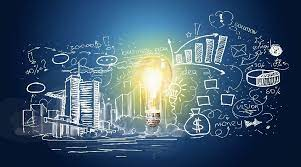>

<br>
<br>

**Agora que já entendemos um pouco das variáveis que compõem nosso dataset, vamos buscar responder as perguntas de negócios realizadas no começo da análise:**

#### Pergunta 01: 

#### Qual é a distribuição demográfica dos clientes em termos de idade e gênero?

**Código em Pandas:**

In [ ]:
df_users_pandas[['Age','Gender']].query('Gender == "Male"').describe().T.\
rename(columns={'count' : 'Quantidade',
                'mean' : 'Média de idade',
                'min' : 'Menor idade',
                'max' : 'Maior idade'},
      index={'Age' : 'Usuários masculinos'}) #observar a média dos usuários masculinos

In [ ]:
df_users_pandas[['Age','Gender']].query('Gender == "Female"').describe().T.\
rename(columns={'count' : 'Quantidade',
                'mean' : 'Média de idade' ,
                'min' : 'Menor idade',
                'max' : 'Maior idade'},
      index={'Age' : 'Usuárias femininas'}) #observar a média das usuárias femininas

**Código em SQL:**

In [ ]:
df_query7 = """
SELECT CASE
        WHEN Gender = 'Male' THEN 'Usuários masculinos' 
        END AS 'Gênero', 
       COUNT(Age) as "Quantidade",
       MIN(Age) as "Menor idade",
       AVG(Age) as "Média de idade",
       MAX(Age) as "Maior idade"
FROM df_prod
WHERE LOWER(Gênero) = 'usuários masculinos' 

"""

ps.sqldf(df_query7)

In [ ]:
df_query8= """
SELECT CASE
        WHEN Gender = 'Female' THEN 'Usuárias femininas' 
        END AS 'Gênero',
        COUNT(Age) as "Quantidade",
        MIN(Age) as "Menor idade",
        AVG(Age) as "Média de idade",
        MAX(Age) as "Maior idade"
FROM df_prod
WHERE LOWER(Gênero) = 'usuárias femininas'
"""
ps.sqldf(df_query8)


- De acordo com o dataset, os homens possuem um maior número de usuários em relação às mulheres. No entanto, ambos os gêneros dos usuários apresentam uma média de idade semelhante, 44 anos!

_________________

_________________

#### Pergunta 02:

#### Os usuários masculinos costumam gastar mais em relação aos femininos? 


**Código em Pandas:**

In [ ]:
df_users_pandas[['Gender','Purchase_Amount_(USD)']].query('Gender == "Male"').describe().T.\
rename(columns={'count' : 'Quantidade de usuários masculinos',
                'mean' : 'Média de gastos de usuários masculinos',
                'min' : 'Gasto mínimo de usuários masculinos',
                'max' : 'Gasto máximo de usuários masculinos'},
        index={'Purchase_Amount_(USD)' : 'Gastos (USD)'})

In [ ]:
df_users_pandas[['Gender','Purchase_Amount_(USD)']].query('Gender == "Female"').describe().T.\
rename(columns={'count' : 'Quantidade de usuárias femininas',
                'mean' : 'Média de gastos de usuárias femininas',
                'min' : 'Gasto mínimo de usuárias femininas',
                'max' : 'Gasto máximo de usuárias femininas'},
        index={'Purchase_Amount_(USD)' : 'Gastos (USD)'})

**Código em SQL:**

In [ ]:
df_query9 = """
SELECT Gender as 'Gênero',
       COUNT('Purchase_Amount_(USD)') AS 'Quantidade de usuários masculinos',
       AVG("Purchase_Amount_(USD)") AS 'Média de gastos de usuários masculinos',
       MIN("Purchase_Amount_(USD)") AS 'Gasto mínimo de usuários masculinos',
       MAX("Purchase_Amount_(USD)") AS 'Gasto máximo de usuários masculinos'
FROM df_prod
WHERE UPPER(Gênero) = 'MALE'

"""
ps.sqldf(df_query9)

In [ ]:
df_query10 = """
SELECT Gender AS 'Gênero',
       COUNT("Purchase_Amount_(USD)") AS 'Quantidade de usuárias femininas',
       AVG("Purchase_Amount_(USD)") AS 'Média de gastos de usuárias femininas',
       MIN("Purchase_Amount_(USD)") AS 'Gasto mínimo de usuárias femininas',
       MAX("Purchase_Amount_(USD)") AS 'Gasto máximo de usuárias femininas'
FROM df_prod
WHERE UPPER(Gênero) = 'FEMALE'


"""
ps.sqldf(df_query10)

- De acordo com o dataset analisado, as usuárias femininas costumam gastar um pouco mais, em média, em relação aos usuários masculinos!

> **Com isso, podemos observar que mesmo em número inferior, as usuárias femininas apresentam uma média de gasto um pouco maior próximo aos usuários masculinos, demonstrando que elas possuem uma elevada capacidade de compra!**

> **Sabendo disso, pode-se realizar uma campanha publiciária que vise atrair mais o público feminino, desenvolvendo mais produtos voltados para esse público como também descontos para as mesmas, o que pode fazer com que aumente a base de clientes femininos, consequentemente a renda das lojas!**

_______________

_______________

#### Pergunta 03:

#### Qual é o item mais comprado em cada categoria entre os diferentes gêneros dos usuários?


    3.1 Para a categoria de Acessórios:

**Código em Pandas:**

In [ ]:
df_users_category_Ace_Male = df_users_pandas[['Item_Purchased', 'Category','Gender']][df_users_pandas['Category'] == 'Accessories'].\
query('Gender == "Male"').value_counts().reset_index().\
rename(columns={'Item_Purchased' : 'Item', 'Category' : 'Categoria', 'Gender' : 'Gênero','count' : 'Quantidade'}).\
sort_values(by='Quantidade',ascending=False)

df_users_category_Ace_Male['(%) do Item'] = round(df_users_category_Ace_Male['Quantidade']/df_users_category_Ace_Male['Quantidade'].sum()*100,2)

df_users_category_Ace_Male['Categoria'] = df_users_category_Ace_Male['Categoria'].map({'Accessories' : 'Acessórios'})

df_users_category_Ace_Male['Gênero'] = df_users_category_Ace_Male['Gênero'].map({'Male' : 'Masculino'})

df_users_category_Ace_Male

In [ ]:
df_users_category_Ace_Female = df_users_pandas[['Item_Purchased', 'Category','Gender']][df_users_pandas['Category'] == 'Accessories'].\
query('Gender == "Female"').value_counts().reset_index().\
rename(columns={'Item_Purchased' : 'Item', 'Category' : 'Categoria', 'Gender' : 'Gênero','count' : 'Quantidade'}).\
sort_values(by='Quantidade',ascending=False)

df_users_category_Ace_Female['(%) do Item'] = round(df_users_category_Ace_Female['Quantidade']/df_users_category_Ace_Female['Quantidade'].sum()*100,2)

df_users_category_Ace_Female['Categoria'] = df_users_category_Ace_Female['Categoria'].map({'Accessories' : 'Acessórios'})

df_users_category_Ace_Female['Gênero'] = df_users_category_Ace_Female['Gênero'].map({'Female' : 'Feminino'})

df_users_category_Ace_Female

**Código em SQL:**

In [ ]:
df_query11 = """
SELECT df_prod.Item_Purchased AS 'Item',
       CASE
           WHEN df_prod.Category = 'Accessories' THEN 'Acessórios'
        END AS 'Categoria',
       CASE 
           WHEN df_prod.Gender = 'Male' THEN 'Masculino' 
        END AS 'Gênero',
       COUNT(df_prod.Item_Purchased) AS 'Quantidade',
       (COUNT(df_prod.Item_Purchased)*100 / (SELECT COUNT(df_prod.Category) FROM df_prod WHERE LOWER(df_prod.Category) = "accessories" AND LOWER(df_prod.Gender) = "male")) as '(%) do Item'
FROM df_prod
WHERE LOWER(Categoria) = "acessórios" AND LOWER(Gênero) = "masculino"
GROUP BY Item
ORDER BY Quantidade DESC

"""
ps.sqldf(df_query11)

In [ ]:
df_query12 = """
SELECT df_prod.Item_Purchased AS 'Item',
       CASE
           WHEN df_prod.Category = 'Accessories' THEN 'Acessórios'
        END AS 'Categoria',
       CASE 
           WHEN df_prod.Gender = 'Female' THEN 'Feminino' 
        END AS 'Gênero',
       COUNT(df_prod.Item_Purchased) AS 'Quantidade',
       (COUNT(df_prod.Item_Purchased)*100 / (SELECT COUNT(df_prod.Category) FROM df_prod WHERE LOWER(df_prod.Category) = "accessories" AND LOWER(df_prod.Gender) = "female")) as '(%) do Item'
FROM df_prod
WHERE LOWER(Categoria) = "acessórios" AND LOWER(Gênero) = "feminino"
GROUP BY Item
ORDER BY Quantidade DESC

"""
ps.sqldf(df_query12)

- O item mais comprado entre o público masculino foi Jóias que representou uma porcentagem de 13,79%, enquanto que para o publico feminino foi Mochila de Mão com 14% das compras da categoria Acessórios!

    3.2 Para a categoria de Roupas:

**Código em Pandas:**

In [ ]:
df_users_category_Clo_Male = df_users_pandas[['Item_Purchased','Category','Gender']][df_users_pandas['Category'] == 'Clothing'].\
query('Gender == "Male"').value_counts().reset_index().\
rename(columns={'Item_Purchased' : 'Item', 'Category' : 'Categoria', 'Gender' : 'Gênero','count' : 'Quantidade'}).\
sort_values(by='Quantidade',ascending=False)

df_users_category_Clo_Male['(%) do Item'] = round(df_users_category_Clo_Male['Quantidade']/df_users_category_Clo_Male['Quantidade'].sum()*100,2)

df_users_category_Clo_Male['Categoria'] = df_users_category_Clo_Male['Categoria'].map({'Clothing' : 'Vestuário'})

df_users_category_Clo_Male['Gênero'] = df_users_category_Clo_Male['Gênero'].map({'Male' : 'Masculino'})

df_users_category_Clo_Male

In [ ]:
df_users_category_Clo_Female = df_users_pandas[['Item_Purchased','Category','Gender']][df_users_pandas['Category'] == 'Clothing'].\
query('Gender == "Female"').\
value_counts().reset_index().\
rename(columns={'Item_Purchased' : 'Item', 'Category' : 'Categoria', 'Gender' : 'Gênero','count' : 'Quantidade'}).\
sort_values(by='Quantidade',ascending=False)

df_users_category_Clo_Female['(%) do Item'] = round(df_users_category_Clo_Female['Quantidade']/df_users_category_Clo_Female['Quantidade'].sum()*100,2)

df_users_category_Clo_Female['Categoria'] = df_users_category_Clo_Female['Categoria'].map({'Clothing' : 'Vestuário'})

df_users_category_Clo_Female['Gênero'] = df_users_category_Clo_Female['Gênero'].map({'Female' : 'Feminino'})

df_users_category_Clo_Female

**Código em SQL:**

In [ ]:
df_query13 = """
SELECT df_prod.Item_Purchased AS 'Item',
       CASE
           WHEN df_prod.Category = 'Clothing' THEN 'Vestuário'
        END AS 'Categoria',
       CASE
           WHEN df_prod.Gender = 'Male' THEN 'Masculino'
        END AS 'Gênero',
       COUNT(df_prod.Item_Purchased) AS 'Quantidade',
       (COUNT(df_prod.Item_Purchased)*100 / (SELECT COUNT(df_prod.Category) FROM df_prod WHERE LOWER(df_prod.Category) = "clothing" AND LOWER(df_prod.Gender) = 'male')) as '(%) do Item'
FROM df_prod
WHERE LOWER(Categoria) = "vestuário" AND LOWER(Gênero) = "masculino"
GROUP BY Item
ORDER BY Quantidade DESC
"""

ps.sqldf(df_query13)

In [ ]:
df_query14 = """
SELECT df_prod.Item_Purchased AS 'Item',
       CASE
           WHEN df_prod.Category = 'Clothing' THEN 'Vestuário'
        END AS 'Categoria',
       CASE
           WHEN df_prod.Gender = 'Female' THEN 'Feminino'
        END AS 'Gênero',
       COUNT(df_prod.Item_Purchased) AS 'Quantidade',
       (COUNT(df_prod.Item_Purchased)*100 / (SELECT COUNT(df_prod.Category) FROM df_prod WHERE LOWER(df_prod.Category) = "clothing" AND LOWER(df_prod.Gender) = 'female')) as '(%) do Item'
FROM df_prod
WHERE LOWER(Categoria) = "vestuário" AND LOWER(Gênero) = "feminino"
GROUP BY Item
ORDER BY Quantidade DESC
"""

ps.sqldf(df_query14)

- Os itens mais comprados entre o público masculino da categoria de Vestuário foram calças e sweters , representando 10% e 9% respectivamente, enquanto que no público feminino foram Blusas, com 11%, e Camisetas, com 10%, de todas as compras da categoria!

    3.3 Para a categoria de calçados:

**Código em Pandas:**

In [ ]:
df_users_category_Foot_Male = df_users_pandas[['Item_Purchased', 'Category','Gender']][df_users_pandas['Category'] == 'Footwear'].\
query('Gender == "Male"').value_counts().\
reset_index().rename(columns={'Item_Purchased' : 'Item', 'Category' : 'Categoria', 'Gender' : 'Gênero', 'count' : 'Quantidade'}).\
sort_values(by='Quantidade',ascending=False)

df_users_category_Foot_Male['(%) do Item'] = round(df_users_category_Foot_Male['Quantidade']/df_users_category_Foot_Male['Quantidade'].sum()*100,2)

df_users_category_Foot_Male['Categoria'] = df_users_category_Foot_Male['Categoria'].map({'Footwear' : 'Calçados'})

df_users_category_Foot_Male['Gênero'] = df_users_category_Foot_Male['Gênero'].map({'Male' : 'Masculino'})

df_users_category_Foot_Male

In [ ]:
df_users_category_Foot_Female = df_users_pandas[['Item_Purchased', 'Category','Gender']][df_users_pandas['Category'] == 'Footwear'].\
query('Gender == "Female"').value_counts().\
reset_index().rename(columns={'Item_Purchased' : 'Item', 'Category' : 'Categoria', 'Gender' : 'Gênero', 'count' : 'Quantidade'}).\
sort_values(by='Quantidade',ascending=False)

df_users_category_Foot_Female['(%) do Item'] = round(df_users_category_Foot_Female['Quantidade']/df_users_category_Foot_Female['Quantidade'].sum()*100,2)

df_users_category_Foot_Female['Categoria'] = df_users_category_Foot_Female['Categoria'].map({'Footwear' : 'Calçados'})

df_users_category_Foot_Female['Gênero'] = df_users_category_Foot_Female['Gênero'].map({'Female' : 'feminino'})

df_users_category_Foot_Female

**Código em SQL:**

In [ ]:
df_query15 = """
SELECT df_prod.Item_Purchased AS 'Item',
        CASE
           WHEN df_prod.Category = 'Footwear' THEN 'Calçados'
        END AS 'Categoria',
        CASE
           WHEN df_prod.Gender = 'Male' THEN 'Masculino'
        END AS 'Gênero',         
       COUNT(df_prod.Item_Purchased) AS 'Quantidade',
       (COUNT(df_prod.Item_Purchased)*100 / (SELECT COUNT(df_prod.Category) FROM df_prod WHERE LOWER(df_prod.Category) = "footwear" AND LOWER(df_prod.Gender) = "male")) as '(%) do Item'
FROM df_prod
WHERE LOWER(Categoria) = "calçados" AND LOWER(Gênero) = "masculino"
GROUP BY Item
ORDER BY Quantidade DESC
"""

ps.sqldf(df_query15)

In [ ]:
df_query16 = """
SELECT df_prod.Item_Purchased AS 'Item',
        CASE
           WHEN df_prod.Category = 'Footwear' THEN 'Calçados'
        END AS 'Categoria',
        CASE
           WHEN df_prod.Gender = 'Female' THEN 'Feminino'
        END AS 'Gênero',         
       COUNT(df_prod.Item_Purchased) AS 'Quantidade',
       (COUNT(df_prod.Item_Purchased)*100 / (SELECT COUNT(df_prod.Category) FROM df_prod WHERE LOWER(df_prod.Category) = "footwear" AND LOWER(df_prod.Gender) = "female")) as '(%) do Item'
FROM df_prod
WHERE LOWER(Categoria) = "calçados" AND LOWER(Gênero) = "feminino"
GROUP BY Item
ORDER BY Quantidade DESC
"""

ps.sqldf(df_query16)

- O item mais comprado entre o público masculino da categoria de Calçados foram tênis, sapatos e sandálias cada um deles representando 25% do total, enquanto que no público feminino foi sandália, com 29% de todas as compras da categoria!

    3.4 Para a categoria de Agasalhos:
    

**Código em Pandas:**

In [ ]:
df_users_category_Aga_Male = df_users_pandas[['Item_Purchased', 'Category','Gender']][df_users_pandas['Category'] == 'Outerwear'].\
query('Gender == "Male"').value_counts().\
reset_index().rename(columns={'Item_Purchased' : 'Item', 'Category' : 'Categoria', 'Gender' : "Gênero",'count' : 'Quantidade'}).\
sort_values(by='Quantidade',ascending=False)

df_users_category_Aga_Male['(%) do Item'] = round(df_users_category_Aga_Male['Quantidade']/df_users_category_Aga_Male['Quantidade'].sum()*100,2)

df_users_category_Aga_Male['Categoria'] = df_users_category_Aga_Male['Categoria'].map({'Outerwear' : 'Agasalhos'})

df_users_category_Aga_Male['Gênero'] = df_users_category_Aga_Male['Gênero'].map({'Male' : 'Masculino'})

df_users_category_Aga_Male

In [ ]:
df_users_category_Aga_Female = df_users_pandas[['Item_Purchased', 'Category','Gender']][df_users_pandas['Category'] == 'Outerwear'].\
query('Gender == "Female"').value_counts().\
reset_index().rename(columns={'Item_Purchased' : 'Item', 'Category' : 'Categoria', 'Gender' : "Gênero",'count' : 'Quantidade'}).\
sort_values(by='Quantidade',ascending=False)

df_users_category_Aga_Female['(%) do Item'] = round(df_users_category_Aga_Female['Quantidade']/df_users_category_Aga_Female['Quantidade'].sum()*100,2)

df_users_category_Aga_Female['Categoria'] = df_users_category_Aga_Female['Categoria'].map({'Outerwear' : 'Agasalhos'})

df_users_category_Aga_Female['Gênero'] = df_users_category_Aga_Female['Gênero'].map({'Female' : 'Feminino'})

df_users_category_Aga_Female

**Código em SQL:**

In [ ]:
df_query17 = """
SELECT 
       df_prod.Item_Purchased AS 'Item',
       CASE
           WHEN df_prod.Category = 'Outerwear' THEN 'Agasalhos'
        END AS 'Categoria',
       CASE
           WHEN df_prod.Gender = 'Male' THEN 'Masculino'
        END AS 'Gênero',
       COUNT(df_prod.Item_Purchased) AS 'Quantidade',
       (COUNT(df_prod.Item_Purchased)*100 / (SELECT COUNT(df_prod.Category) FROM df_prod WHERE LOWER(df_prod.Category) = "outerwear" AND LOWER(df_prod.Gender) = "male")) as '(%) do Item'
FROM df_prod
WHERE LOWER(Categoria) = "agasalhos" AND LOWER(Gênero) = "masculino"
GROUP BY Item
ORDER BY Quantidade DESC
"""

ps.sqldf(df_query17)

In [ ]:
df_query18 = """
SELECT 
       df_prod.Item_Purchased AS 'Item',
       CASE
           WHEN df_prod.Category = 'Outerwear' THEN 'Agasalhos'
        END AS 'Categoria',
       CASE
           WHEN df_prod.Gender = 'Female' THEN 'Feminino'
        END AS 'Gênero',
       COUNT(df_prod.Item_Purchased) AS 'Quantidade',
       (COUNT(df_prod.Item_Purchased)*100 / (SELECT COUNT(df_prod.Category) FROM df_prod WHERE LOWER(df_prod.Category) = "outerwear" AND LOWER(df_prod.Gender) = "female")) as '(%) do Item'
FROM df_prod
WHERE LOWER(Categoria) = "agasalhos" AND LOWER(Gênero) = "feminino"
GROUP BY Item
ORDER BY Quantidade DESC
"""

ps.sqldf(df_query18)

- O item mais comprado entre o público masculino da categoria de Agasalhos foi casacos, representando 51%, enquanto que no público feminino foi jaqueta com 53% de todas as compras da categoria!

> **Foi visto que as categorias que possuem maior tipos de itens são as que os usuários mais realizam compras! Onde, a categoria com mais compras foi Vestuários que conta com 11 itens, enquanto que a menor foi Agasalhos que conta apenas com 2 itens!**

> **Sabendo disto pode-se avaliar a possibilidade da realização de ofertas que visem uma maior venda dos produtos da linha de agasalhos aumentando os tipos de itens que o compõem, tendo em vista que nesta categoria existem apenas dois itens e, isto pode esta associado ao baixo numero de compras!**

_________________

_________________

#### Pergunta 04: 

####    Há uma tendência específica de cor e de tipo de itens nas compras em relação ao tipo de Coleção?   
    


In [ ]:
df_users_pandas['Season'].unique()

4.1.1 Cor de item mais comprada para a coleção de inverno (Winter):

**Código em Pandas:**

In [ ]:
df_users_pandas[['Color','Season']].query('Season == "Winter"').value_counts().reset_index().\
rename(columns={'Color' : 'Cor', 'Season' : 'Coleção', 'count' : 'Quantidade de Itens'}).loc[0:4]

**Código em SQL:**

In [ ]:
df_query19 = """
SELECT df_info.Color as 'Cor',
       df_info.Season as 'Coleção',
       COUNT(df_info.Color) as 'Quantidade de Itens'
FROM df_info
WHERE LOWER(Coleção) = 'winter'
GROUP BY Cor
ORDER BY "Quantidade de Itens" DESC
LIMIT 5

"""

ps.sqldf(df_query19)

- Na coleção de Inverno, é visto que existe uma maior quantidade de compra pelos usuários de itens da cor Verde!

4.1.2 Itens mais comprados para a coleção de inverno (Winter):

**Código em Pandas:**

In [ ]:
df_users_pandas[['Item_Purchased','Season']].query('Season == "Winter"').value_counts().reset_index().\
rename(columns={'Item_Purchased' : 'Item', 'Season' : 'Coleção', 'count' : 'Quantidade de Itens'}).loc[0:4]

**Código em SQL:**

In [ ]:
df_query19_2 = """
SELECT df_prod.Item_Purchased as 'Item',
       df_info.Season as 'Coleção',
       COUNT(df_prod.Item_Purchased) as 'Quantidade de Itens'
FROM df_info
INNER JOIN df_prod
ON df_prod.Customer_ID = df_info.Customer_ID
WHERE LOWER(Coleção) = 'winter'
GROUP BY Item
ORDER BY "Quantidade de Itens" DESC
LIMIT 5

"""

ps.sqldf(df_query19_2)

- De acordo com as análises, é visto que os principais itens mais comprados da coleção de Inverno são Óculos de sol, Calças e camisetas!

4.2.1 Cor de item mais comprada para a coleção de primavera (Spring):

**Código em Pandas:**

In [ ]:
df_users_pandas[['Color','Season']].query('Season == "Spring"').value_counts().reset_index().\
rename(columns={'Color' : 'Cor', 'Season' : 'Coleção', 'count' : 'Quantidade de Itens'}).loc[0:4]

**Código em SQL:**

In [ ]:
df_query20 = """
SELECT df_info.Color as 'Cor',
       df_info.Season as 'Coleção',
       COUNT(df_info.Color) as 'Quantidade de Itens'
FROM df_info
WHERE LOWER(Coleção) = 'spring'
GROUP BY Cor
ORDER BY "Quantidade de Itens" DESC
LIMIT 5

"""

ps.sqldf(df_query20)

- Na coleção de Primavera, é visto que existe uma maior quantidade de compra pelos usuários de itens da cor oliva, similar ao verde! 


4.2.2 Itens mais comprados para a coleção de primavera (Spring):

**Código em Pandas:**

In [ ]:
df_users_pandas[['Item_Purchased','Season']].query('Season == "Spring"').value_counts().reset_index().\
rename(columns={'Item_Purchased' : 'Item', 'Season' : 'Coleção', 'count' : 'Quantidade de Itens'}).loc[0:4]

**Código em SQL:**

In [ ]:
df_query20_2 = """
SELECT df_prod.Item_Purchased as 'Item',
       df_info.Season as 'Coleção',
       COUNT(df_prod.Item_Purchased) as 'Quantidade de Itens'
FROM df_info
INNER JOIN df_prod
ON df_prod.Customer_ID = df_info.Customer_ID
WHERE LOWER(Coleção) = 'spring'
GROUP BY Item
ORDER BY "Quantidade de Itens" DESC
LIMIT 5

"""

ps.sqldf(df_query20_2)

- De acordo com as análises, é visto que o principal item mais comprado da coleção de Primavera é o Sweater! 


4.3.1  Cor de item mais comprada para a coleção de verão (Summer):


**Código em Pandas:**

In [ ]:
df_users_pandas[['Color','Season']].query('Season == "Summer"').value_counts().reset_index().\
rename(columns={'Color' : 'Cor', 'Season' : 'Coleção', 'count' : 'Quantidade de Itens'}).loc[0:4]

**Código em SQL:**

In [ ]:
df_query21 = """
SELECT df_info.Color as 'Cor',
       df_info.Season as 'Coleção',
       COUNT(df_info.Color) as 'Quantidade de Itens'
FROM df_info
WHERE LOWER(Coleção) = 'summer'
GROUP BY Cor
ORDER BY "Quantidade de Itens" DESC
LIMIT 5

"""

ps.sqldf(df_query21)

- Na coleção de Verão, é visto que existe uma maior quantidade de compra pelos usuários de itens da cor prateada! 


4.3.2  Itens mais comprados para a coleção de verão (Summer):

**Código em Pandas:**

In [ ]:
df_users_pandas[['Item_Purchased','Season']].query('Season == "Summer"').value_counts().reset_index().\
rename(columns={'Item_Purchased' : 'Item', 'Season' : 'Coleção', 'count' : 'Quantidade de Itens'}).loc[0:4]

**Código em SQL:**

In [ ]:
df_query21_2 = """
SELECT df_prod.Item_Purchased as 'Item',
       df_info.Season as 'Coleção',
       COUNT(df_prod.Item_Purchased) as 'Quantidade de Itens'
FROM df_info
INNER JOIN df_prod
ON df_prod.Customer_ID = df_info.Customer_ID
WHERE LOWER(Coleção) = 'summer'
GROUP BY Item
ORDER BY "Quantidade de Itens" DESC
LIMIT 5

"""

ps.sqldf(df_query21_2)

- De acordo com as análises, é visto que o principal item mais comprado da coleção de Verão é a calça! 

4.4.1 Cor de item mais comprada para a coleção de outono (Fall):


**Código em Pandas:**

In [ ]:
df_users_pandas[['Color','Season']].query('Season == "Fall"').value_counts().reset_index().\
rename(columns={'Color' : 'Cor', 'Season' : 'Coleção', 'count' : 'Quantidade de Itens'}).loc[0:4]

**Código em SQL:**

In [ ]:
df_query22 = """
SELECT df_info.Color as 'Cor',
       df_info.Season as 'Coleção',
       COUNT(df_info.Color) as 'Quantidade de Itens'
FROM df_info
WHERE LOWER(Coleção) = 'fall'
GROUP BY Cor
ORDER BY "Quantidade de Itens" DESC
LIMIT 5

"""

ps.sqldf(df_query22)

- Na coleção de Outono, é visto que existe uma maior quantidade de compra pelos usuários de itens da cor amarela e magenta, cores claras e vívidas!


4.4.2  Itens mais comprados para a coleção de outono (Fall):

**Código em Pandas:**

In [ ]:
df_users_pandas[['Item_Purchased','Season']].query('Season == "Fall"').value_counts().reset_index().\
rename(columns={'Item_Purchased' : 'Item', 'Season' : 'Coleção', 'count' : 'Quantidade de Itens'}).loc[0:4]

**Código em SQL:**

In [ ]:
df_query22_2 = """
SELECT df_prod.Item_Purchased as 'Item',
       df_info.Season as 'Coleção',
       COUNT(df_prod.Item_Purchased) as 'Quantidade de Itens'
FROM df_info
INNER JOIN df_prod
ON df_prod.Customer_ID = df_info.Customer_ID
WHERE LOWER(Coleção) = 'fall'
GROUP BY Item
ORDER BY "Quantidade de Itens" DESC
LIMIT 5

"""

ps.sqldf(df_query22_2)

- De acordo com as análises, é visto que os principais itens comprados da coleção de Outono são a jaqueta e o chapéu! 

> **Ao analisar a preferência de cores pelos usuários, observou que cores claras tendem a ser mais compradas, com isso pode-se pensar em uma coleção completa de itens focados em cores mais claras conjuntamente com uma ação de marketing para dissemina-la!**

_________________

_________________

#### Pergunta 05:
#### Os clientes que usam códigos promocionais têm maior propensão à assinatura?


**Código em Pandas:**

In [ ]:
df_assinatura_Yes = df_users_pandas[['Promo_Code_Used','Subscription_Status']].query('Promo_Code_Used == "Yes"').value_counts().reset_index().\
rename(columns={'Promo_Code_Used' : 'Código promocional', 'Subscription_Status' : 'Status da Assinatura','count' : 'Nº indivíduos'})

df_assinatura_Yes['% de invidíduos'] = round((df_assinatura_Yes['Nº indivíduos'] / df_assinatura_Yes['Nº indivíduos'].sum())*100,0)

df_assinatura_Yes

In [ ]:
df_assinatura_No = df_users_pandas[['Promo_Code_Used','Subscription_Status']].query('Promo_Code_Used == "No"').value_counts().reset_index().\
rename(columns={'Promo_Code_Used' : 'Código promocional', 'Subscription_Status' : 'Status da Assinatura', 'count' : 'Nº indivíduos'})

df_assinatura_No['% de invidíduos'] = (df_assinatura_No['Nº indivíduos'] / df_assinatura_No['Nº indivíduos'].sum())*100

df_assinatura_No

**Código em SQL:**

In [ ]:
df_query23 = """
SELECT df_info.Promo_Code_Used as 'Código promocional',
       df_info.Subscription_Status as 'Status da assinatura',
       COUNT(df_info.Subscription_Status) as 'Nº de usuários',
       (COUNT(df_info.Subscription_Status)*100 / (SELECT COUNT(df_info.Promo_Code_Used) FROM df_info WHERE LOWER(df_info.Promo_Code_Used) = 'yes')) AS "% de indivíduos"
FROM df_info
WHERE LOWER("Código promocional") = "yes"
GROUP BY "Status da assinatura"
ORDER BY "Nº de usuários" DESC

"""

ps.sqldf(df_query23)

In [ ]:
df_query23 = """
SELECT df_info.Promo_Code_Used as 'Código promocional',
       df_info.Subscription_Status as 'Status da assinatura',
       COUNT(df_info.Subscription_Status) as 'Nº de usuários',
       (COUNT(df_info.Subscription_Status)*100 / (SELECT COUNT(df_info.Promo_Code_Used) FROM df_info WHERE LOWER(df_info.Promo_Code_Used) = 'no')) AS "% de indivíduos"
FROM df_info
WHERE LOWER("Código promocional") = "no"
GROUP BY "Status da assinatura"
ORDER BY "Nº de usuários" DESC

"""

ps.sqldf(df_query23)

- De acordo com as análises, é visto que a maioria dos usuários, 63% deles, que usam código promocional em suas compras optaram pelo plano de assinatura!

_________________

_________________

#### Pergunta 06:
#### Os clientes que usam códigos promocionais tendem a gastar mais?

**Código em Pandas:**

In [ ]:
df_users_pandas.query('Promo_Code_Used == "Yes"')['Purchase_Amount_(USD)'].agg(['sum','count']).reset_index().\
rename(columns={'index' : 'Usuários que utilizaram código promocional', 'Purchase_Amount_(USD)' : 'Valores'}).\
replace({'sum' : 'Montante total (USD)', 'count' : 'Nº de compras'})

In [ ]:
df_users_pandas.query('Promo_Code_Used == "No"')['Purchase_Amount_(USD)'].agg(['sum','count']).reset_index().\
rename(columns={'index' : 'Usuários que não utilizaram código promocional', 'Purchase_Amount_(USD)' : 'Valores'}).\
replace({'sum' : 'Montante total (USD)', 'count' : 'Nº de compras'})

**Código em SQL:**

In [ ]:
df_query24_1 = """
SELECT 
    CASE 
        WHEN df_info.Promo_Code_Used = 'Yes' THEN 'Sim'
    END AS 'Uso do código promocional',
    SUM( "Purchase_Amount_(USD)") as 'Montante total',
    COUNT("Purchase_Amount_(USD)") as 'Nº de usuários'
FROM df_prod
INNER JOIN df_info
ON df_info.Customer_ID = df_prod.Customer_ID
WHERE LOWER("Uso do código promocional") = 'sim'
"""

ps.sqldf(df_query24_1)

In [ ]:
df_query24_2 = """
SELECT 
    CASE 
        WHEN df_info.Promo_Code_Used = 'No' THEN 'Não'
    END AS 'Uso do código promocional',
    SUM("Purchase_Amount_(USD)") as 'Montante total',
    COUNT("Purchase_Amount_(USD)") as 'Nº de usuários'
FROM df_prod
INNER JOIN df_info
ON df_info.Customer_ID = df_prod.Customer_ID
WHERE LOWER("Uso do código promocional") = 'não'

"""

ps.sqldf(df_query24_2)

- De acordo com as análises, usuários que costumam utilizar código promocional em suas compras não gastam mais em relação aqueles que não utilizam os códigos promocionais!


> **Visando atrair mais o público para o clube de assinatura, como usuários presente nos 37% dos que receberam código promocional mas não são assinantes e os 2223 usuários que não possuiam código promocional, pode-se englobar mais vantagens para o clube de assinatura, como mais códigos promocionais, maiores descontos, frete grátis, ofertas de compre um leve dois, e, principalmente, ofertas exclusivas para àqueles que assinarem pela primeira o clube!**


_________________

_________________

#### Pergunta 07:
#### Qual a predileção de produtos comprados pelos jovens (entre 18 e 25 anos) em relação aos adultos (maior que 25 anos)? Esta predileção varia em relação ao gênero?

    - 7.1 Em relação aos usuários masculinos:

**Código em Pandas:**

    > Criação de uma variável chamada 'Fase' baseada na coluna 'Age', onde a mesma apresenta dois níveis:
        . Jovem = indivíduos abaixo de 25 anos (18 - 25 anos)
        . Adulto = indivíduos acima de 25 anos (> 25 anos)

In [ ]:
df_users_pandas.loc[df_users_pandas['Age'] <= 25, 'Fase'] = 'Jovem'
df_users_pandas.loc[df_users_pandas['Age'] >  25, 'Fase'] = 'Adulto'

df_users_pandas

    > Selecionando apenas as variáveis utilizadas para responder a minha pergunta:


In [ ]:
df_item = df_users_pandas[['Item_Purchased','Gender','Fase']]

df_item

In [ ]:
df_item_adultmale = df_item.query('Gender == "Male" & Fase == "Adulto"').value_counts().reset_index().\
rename(columns={'Item_Purchased' : 'Item', 'Gender' : 'Gênero', 'Fase' : 'Faixa etária', 'count' : 'Nº de itens'})

df_item_adultmale['% do item'] = round(df_item_adultmale['Nº de itens'] / sum(df_item_adultmale['Nº de itens'])*100,2)

df_item_adultmale.head(10)


In [ ]:
df_item_jovemmale = df_item.query('Gender == "Male" & Fase == "Jovem"').value_counts().reset_index().\
rename(columns={'Item_Purchased' : 'Item', 'Gender' : 'Gênero', 'Fase' : 'Faixa etária', 'count' : 'Nº de itens'})

df_item_jovemmale['% do item'] = round(df_item_jovemmale['Nº de itens'] / sum(df_item_jovemmale['Nº de itens'])*100,2)

df_item_jovemmale.head(10)

**Código em SQL:**

In [ ]:
df_query25_1 = """
SELECT
    df_prod.Item_Purchased AS 'Item',
    df_prod.Gender AS 'Gênero',
    CASE
        WHEN df_prod.Age <= 25 THEN 'Jovem'
        WHEN df_prod.Age > 25 THEN 'Adulto'
    END AS 'Faixa etária',
    COUNT(df_prod.Item_Purchased) as 'Nº de itens',
    (COUNT(df_prod.Item_Purchased)*100 / (SELECT COUNT(df_prod.Item_Purchased) FROM df_prod WHERE LOWER(df_prod.Gender) = "male" AND df_prod.Age > 25)) as '(%) do Item'
FROM df_prod
WHERE LOWER(Gênero) = 'male' AND LOWER("Faixa etária") = 'adulto'
GROUP BY "Item"
ORDER BY "Nº de itens" DESC
LIMIT 10

"""

ps.sqldf(df_query25_1)

In [ ]:
df_query25_2 = """
SELECT
    df_prod.Item_Purchased AS 'Item',
    df_prod.Gender AS 'Gênero',
    CASE
        WHEN df_prod.Age <= 25 THEN 'Jovem'
        WHEN df_prod.Age > 25 THEN 'Adulto'
    END AS 'Faixa etária',
    COUNT(df_prod.Item_Purchased) as 'Nº de itens',
    (COUNT(df_prod.Item_Purchased)*100 / (SELECT COUNT(df_prod.Item_Purchased) FROM df_prod WHERE LOWER(df_prod.Gender) = "male" AND df_prod.Age <= 25)) as '(%) do Item'
FROM df_prod
WHERE LOWER(Gênero) = 'male' AND LOWER("Faixa etária") = 'jovem'
GROUP BY "Item"
ORDER BY "Nº de itens" DESC
LIMIT 10


"""

ps.sqldf(df_query25_2)

- De acordo com o dados, foi visto que o público masculino adulto, usuários maiores de 25 anos, compram mais itens em relação aos jovens e possuem um gosto na escolha dos itens diferentes! 

<j>

- Os adultos costumam comprar mais joias e calças, enquanto que os jovens costumam comprar, principalmente, sueters e saias, sendo este como um possivel presente para, mãe, irmã ou namorada! 

    - 7.2 Em relação ao público feminino:

**Código em Pandas:**

In [ ]:
df_item_adultfemale = df_item.query('Gender == "Female" & Fase == "Adulto"').value_counts().reset_index().\
rename(columns={'Item_Purchased' : 'Item', 'Gender' : 'Gênero', 'Fase' : 'Faixa etária', 'count' : 'Nº de itens'})

df_item_adultfemale['% do item'] = round(df_item_adultfemale['Nº de itens'] / sum(df_item_adultfemale['Nº de itens'])*100,2)

df_item_adultfemale.head(10)

In [ ]:
df_item_jovemfemale = df_item.query('Gender == "Female" & Fase == "Jovem"').value_counts().reset_index().\
rename(columns={'Item_Purchased' : 'Item', 'Gender' : 'Gênero', 'Fase' : 'Faixa etária', 'count' : 'Nº de itens'})

df_item_jovemfemale['% do item'] = round(df_item_jovemfemale['Nº de itens'] / sum(df_item_jovemfemale['Nº de itens'])*100,2)

df_item_jovemfemale.head(10)

**Código em SQL:**

In [ ]:
df_query26_1 = """
SELECT
    df_prod.Item_Purchased AS 'Item',
    df_prod.Gender AS 'Gênero',
    CASE
        WHEN df_prod.Age <= 25 THEN 'Jovem'
        WHEN df_prod.Age > 25 THEN 'Adulto'
    END AS 'Faixa etária',
    COUNT(df_prod.Item_Purchased) as 'Nº de itens',
    (COUNT(df_prod.Item_Purchased)*100 / (SELECT COUNT(df_prod.Item_Purchased) FROM df_prod WHERE LOWER(df_prod.Gender) = "female" AND df_prod.Age > 25)) as '(%) do Item'
FROM df_prod
WHERE LOWER(Gênero) = 'female' AND LOWER("Faixa etária") = 'adulto'
GROUP BY "Item"
ORDER BY "Nº de itens" DESC
LIMIT 10


"""

ps.sqldf(df_query26_1)

In [ ]:
df_query26_2 = """
SELECT
    df_prod.Item_Purchased AS 'Item',
    df_prod.Gender AS 'Gênero',
    CASE
        WHEN df_prod.Age <= 25 THEN 'Jovem'
        WHEN df_prod.Age > 25 THEN 'Adulto'
    END AS 'Faixa etária',
    COUNT(df_prod.Item_Purchased) as 'Nº de itens',
    (COUNT(df_prod.Item_Purchased)*100 / (SELECT COUNT(df_prod.Item_Purchased) FROM df_prod WHERE LOWER(df_prod.Gender) = "female" AND df_prod.Age <= 25)) as '(%) do Item'
FROM df_prod
WHERE LOWER(Gênero) = 'female' AND LOWER("Faixa etária") = 'jovem'
GROUP BY "Item"
ORDER BY "Nº de itens" DESC
LIMIT 10

"""

ps.sqldf(df_query26_2)

- De acordo com o dados, foi visto que o público feminino adulto, usuárias maiores de 25 anos, compram mais itens em relação às jovens e possuem um gosto na escolha dos itens diferentes! 


<j>


- As adultas costumam comprar mais blusas e saias, enquanto que as jovens costumam comprar, principalmente, shorts, tênis e sueters e blusas!

> **Usuários adultos tendem a gastar mais que os jovens, independentemente do gênero, o que pode estar associado ao maior poder aquisitivos dos adultos. Sabendo disto, pode-se tentar desenvolver ofertas que busquem atrair mais o público jovem, como descontos para primeira compra em cada loja, realizar campanhas de marketing que famosos cujo público alvo são os jovens, como blogueiras de moda, TikTokers, atores e atrizes de séries em alta, buscando despertar neste público jovem uma aproximação com seus ídolos por meio do produto apresentado por essas celebridades!**

_________________

_________________

#### Pergunta 08:
#### Qual é o perfil de compra dos usuários não assinantes em relação àqueles que são assinantes? 

    - 8.1 Perfil dos usuários assinantes:

**Código em Pandas:**

In [ ]:
df_users_pandas[['Age','Purchase_Amount_(USD)','Subscription_Status']].query('Subscription_Status == "Yes"').describe().T.\
rename(columns={'count' : 'Nº de usuários', 
                'mean' : 'Média', 'std':'Desvio Padrão',
                'min' : 'Valor mínimo', 'max' : 'Valor máximo'},
      index={'Age' : 'Idade', 'Purchase_Amount_(USD)' : 'Montante gasto ($)'})

In [ ]:
df_perfil_sim = df_users_pandas[['Gender','Subscription_Status']].query('Subscription_Status == "Yes"').\
value_counts().reset_index().rename(columns={'Gender' : 'Gênero dos usuários', 'Subscription_Status' : 'Assinantes',
                                             'count' : 'Nº de usuários'})

df_perfil_sim['% dos usuários'] = round(df_perfil_sim['Nº de usuários'] / sum(df_perfil_sim['Nº de usuários'])*100,2)

df_perfil_sim

In [ ]:
df_users_pandas[['Category','Purchase_Amount_(USD)','Subscription_Status']].query('Subscription_Status == "Yes"').\
groupby('Category').describe().rename(columns={'count' : 'Nº de usuários', 
                'mean' : 'Média', 'std':'Desvio Padrão',
                'min' : 'Valor mínimo', 'max' : 'Valor máximo'}).sort_values(by=[('Purchase_Amount_(USD)', 'Média')],ascending=False)

In [ ]:
df_users_pandas[['Location','Purchase_Amount_(USD)','Subscription_Status']].query('Subscription_Status == "Yes"').\
groupby('Location').describe().rename(columns={'count' : 'Nº de usuários', 
                'mean' : 'Média', 'std':'Desvio Padrão',
                'min' : 'Valor mínimo', 'max' : 'Valor máximo'}).sort_values(by=[('Purchase_Amount_(USD)', 'Nº de usuários')],ascending=False).\
head(10)

In [ ]:
df_users_pandas[['Location','Purchase_Amount_(USD)','Subscription_Status']].query('Subscription_Status == "Yes"').\
groupby('Location').describe().rename(columns={'count' : 'Nº de usuários', 
                'mean' : 'Média', 'std':'Desvio Padrão',
                'min' : 'Valor mínimo', 'max' : 'Valor máximo'}).sort_values(by=[('Purchase_Amount_(USD)', 'Média')],ascending=False).\
head(10)

**Código em SQL:**

In [ ]:
df_query27_1 = """
SELECT CASE
            WHEN df_info.Subscription_Status = 'Yes' THEN 'Sim'
            END AS 'Assinantes',
       COUNT(df_prod.Age) as 'Nº de usuários',
       MIN(df_prod.Age) as 'Idade mínima',
       AVG(df_prod.Age) as 'Média de idade',
       MAX(df_prod.Age) as 'Idade máxima',
       MIN("Purchase_Amount_(USD)") as 'Montante gasto mínimo($)',
       AVG("Purchase_Amount_(USD)") as 'Montante gasto médio($)',
       MAX("Purchase_Amount_(USD)") as 'Montante gasto máximo($)'
FROM df_prod
INNER JOIN df_info
ON df_info.Customer_ID = df_prod.Customer_ID
WHERE LOWER(Assinantes) = 'sim'
    

"""

ps.sqldf(df_query27_1)

In [ ]:
df_query27_2 = """
SELECT  df_prod.Gender AS 'Gênero dos usuários',
        CASE
            WHEN df_info.Subscription_Status = 'Yes' THEN 'Sim'
            END AS 'Assinantes',
        COUNT(df_info.Subscription_Status) as 'Nº de usuários',
        (COUNT(df_info.Subscription_Status)*100 / (SELECT COUNT(df_info.Subscription_Status) FROM df_info WHERE LOWER(df_info.Subscription_Status) = 'yes')) as '% dos usuários'
FROM df_info
INNER JOIN df_prod
ON df_info.Customer_ID = df_prod.Customer_ID
WHERE LOWER(Assinantes) = 'sim'
 

"""

ps.sqldf(df_query27_2)

In [ ]:
df_query27_3 = """
SELECT  df_prod.Category as 'Categoria dos Itens',
        CASE
            WHEN df_info.Subscription_Status = 'Yes' THEN 'Sim'
            END AS 'Assinantes',
        COUNT(df_prod.Category) as 'Nº de usuários',
        AVG("Purchase_Amount_(USD)") as 'Média de gastos($)',
        MIN("Purchase_Amount_(USD)") as 'Valor mínimo($)',
        MAX("Purchase_Amount_(USD)") as 'Valor máximo($)'
FROM df_prod
INNER JOIN df_info
ON df_prod.Customer_ID = df_info.Customer_ID
WHERE LOWER(Assinantes) = 'sim'
GROUP BY "Categoria dos Itens"
ORDER BY "Média de gastos($)" DESC
 

"""

ps.sqldf(df_query27_3)

In [ ]:
df_query27_4 = """
SELECT  df_info.Location as 'Estado dos usuários',
        CASE
            WHEN df_info.Subscription_Status = 'Yes' THEN 'Sim'
            END AS 'Assinantes',
        COUNT(df_info.Location) as 'Nº de usuários',
        AVG("Purchase_Amount_(USD)") as 'Média de gastos($)',
        MIN("Purchase_Amount_(USD)") as 'Valor mínimo($)',
        MAX("Purchase_Amount_(USD)") as 'Valor máximo($)'
FROM df_prod
INNER JOIN df_info
ON df_prod.Customer_ID = df_info.Customer_ID
WHERE LOWER(Assinantes) = 'sim'
GROUP BY "Estado dos usuários"
ORDER BY "Nº de usuários" DESC
 

"""

ps.sqldf(df_query27_4)

In [ ]:
df_query27_5 = """
SELECT  df_info.Location as 'Estado dos usuários',
        CASE
            WHEN df_info.Subscription_Status = 'Yes' THEN 'Sim'
            END AS 'Assinantes',
        COUNT(df_info.Location) as 'Nº de usuários',
        AVG("Purchase_Amount_(USD)") as 'Média de gastos($)',
        MIN("Purchase_Amount_(USD)") as 'Valor mínimo($)',
        MAX("Purchase_Amount_(USD)") as 'Valor máximo($)'
FROM df_prod
INNER JOIN df_info
ON df_prod.Customer_ID = df_info.Customer_ID
WHERE LOWER(Assinantes) = 'sim'
GROUP BY "Estado dos usuários"
ORDER BY "Média de gastos($)" DESC
 

"""

ps.sqldf(df_query27_5)

- Após a realização das análise, foi visto que o perfil dos usuários assinantes conta com um **total de 1053 indivíduos**, dentre os quais **todos são homens** cuja **média de idade é de 44 anos**, e uma **média de gastos de 59 dólares** em produtos.


<j>


- Os assinantes possuem uma **média de gastos maior na categoria de FootWear (calçados), totalizando  60,46 dólares** e uma **menor média de gastos na categoria de Outerwear (agasalhos), com 58,65 dólares**. No entanto, o maior e menor número de usuários realizam compras, respectivamente, na categoria Clothing (vestuários), totalizando 457 indivíduos e Outerwear (agasalhos) totalizando 91 indivíduos.

    
<j>

    
- A **maioria dos assinantes pertencem principalmente aos estados de Nevada, California, West Virginia e Delaware**, com uma faixa de 30 a 28 indivíduos de cada. No entanto, os estados que possuem uma **maior média de gastos são principalmente West Virgínia, Arizona, Idaho e Rhode Island**, e os **menores são New Jersey, Minnesota, Colorado e Connecticut!**

    - 8.2 Perfil dos usuários não assinantes:

**Código em Pandas:**

In [ ]:
df_users_pandas[['Age','Purchase_Amount_(USD)','Subscription_Status']].query('Subscription_Status == "No"').describe().T.\
rename(columns={'count' : 'Nº de usuários', 
                'mean' : 'Média', 'std':'Desvio Padrão',
                'min' : 'Valor mínimo', 'max' : 'Valor máximo'},
      index={'Age' : 'Idade', 'Purchase_Amount_(USD)' : 'Montante gasto ($)'})

In [ ]:
df_perfil_no = df_users_pandas[['Gender','Subscription_Status']].query('Subscription_Status == "No"').\
value_counts().reset_index().rename(columns={'Gender' : 'Gênero dos usuários', 'Subscription_Status' : 'Assinantes',
                                             'count' : 'Nº de usuários'})

df_perfil_no['% dos usuários'] = round(df_perfil_no['Nº de usuários'] / sum(df_perfil_no['Nº de usuários'])*100,2)

df_perfil_no

In [ ]:
df_users_pandas[['Category','Purchase_Amount_(USD)','Subscription_Status']].query('Subscription_Status == "No"').\
groupby('Category').describe().rename(columns={'count' : 'Nº de usuários', 
                'mean' : 'Média', 'std':'Desvio Padrão',
                'min' : 'Valor mínimo', 'max' : 'Valor máximo'}).sort_values(by=[('Purchase_Amount_(USD)', 'Média')],ascending=False)

In [ ]:
df_users_pandas[['Location','Purchase_Amount_(USD)','Subscription_Status']].query('Subscription_Status == "No"').\
groupby('Location').describe().rename(columns={'count' : 'Nº de usuários', 
                'mean' : 'Média', 'std':'Desvio Padrão',
                'min' : 'Valor mínimo', 'max' : 'Valor máximo'}).sort_values(by=[('Purchase_Amount_(USD)', 'Nº de usuários')],ascending=False).\
head(10)

In [ ]:
df_users_pandas[['Location','Purchase_Amount_(USD)','Subscription_Status']].query('Subscription_Status == "No"').\
groupby('Location').describe().rename(columns={'count' : 'Nº de usuários', 
                'mean' : 'Média', 'std':'Desvio Padrão',
                'min' : 'Valor mínimo', 'max' : 'Valor máximo'}).sort_values(by=[('Purchase_Amount_(USD)', 'Média')],ascending=False).\
head(10)

**Código em SQL:**

In [ ]:
df_query28_1 = """
SELECT CASE
            WHEN df_info.Subscription_Status = 'No' THEN 'Não'
            END AS 'Assinantes',
       COUNT(df_prod.Age) as 'Nº de usuários',
       MIN(df_prod.Age) as 'Idade mínima',
       AVG(df_prod.Age) as 'Média de idade',
       MAX(df_prod.Age) as 'Idade máxima',
       MIN("Purchase_Amount_(USD)") as 'Montante gasto mínimo($)',
       AVG("Purchase_Amount_(USD)") as 'Montante gasto médio($)',
       MAX("Purchase_Amount_(USD)") as 'Montante gasto máximo($)'
FROM df_prod
INNER JOIN df_info
ON df_info.Customer_ID = df_prod.Customer_ID
WHERE LOWER(Assinantes) = 'não'
    

"""

ps.sqldf(df_query28_1)

In [ ]:
df_query28_2 = """
SELECT  df_prod.Gender AS 'Gênero dos usuários',
        CASE
            WHEN df_info.Subscription_Status = 'No' THEN 'Não'
            END AS 'Assinantes',
        COUNT(df_info.Subscription_Status) as 'Nº de usuários',
        (COUNT(df_info.Subscription_Status)*100 / (SELECT COUNT(df_info.Subscription_Status) FROM df_info WHERE LOWER(df_info.Subscription_Status) = 'no')) as '% dos usuários'
FROM df_info
INNER JOIN df_prod
ON df_info.Customer_ID = df_prod.Customer_ID
WHERE LOWER(Assinantes) = 'não'
GROUP BY "Gênero dos usuários"
ORDER BY "Nº de usuários" DESC
 

"""

ps.sqldf(df_query28_2)

In [ ]:
df_query28_3 = """
SELECT  df_prod.Category as 'Categoria dos Itens',
        CASE
            WHEN df_info.Subscription_Status = 'No' THEN 'Não'
            END AS 'Assinantes',
        COUNT(df_prod.Category) as 'Nº de usuários',
        AVG("Purchase_Amount_(USD)") as 'Média de gastos($)',
        MIN("Purchase_Amount_(USD)") as 'Valor mínimo($)',
        MAX("Purchase_Amount_(USD)") as 'Valor máximo($)'
FROM df_prod
INNER JOIN df_info
ON df_prod.Customer_ID = df_info.Customer_ID
WHERE LOWER(Assinantes) = 'não'
GROUP BY "Categoria dos Itens"
ORDER BY "Média de gastos($)" DESC
 

"""

ps.sqldf(df_query28_3)

In [ ]:
df_query28_4 = """
SELECT  df_info.Location as 'Estado dos usuários',
        CASE
            WHEN df_info.Subscription_Status = 'No' THEN 'Não'
            END AS 'Assinantes',
        COUNT(df_info.Location) as 'Nº de usuários',
        AVG("Purchase_Amount_(USD)") as 'Média de gastos($)',
        MIN("Purchase_Amount_(USD)") as 'Valor mínimo($)',
        MAX("Purchase_Amount_(USD)") as 'Valor máximo($)'
FROM df_prod
INNER JOIN df_info
ON df_prod.Customer_ID = df_info.Customer_ID
WHERE LOWER(Assinantes) = 'não'
GROUP BY "Estado dos usuários"
ORDER BY "Nº de usuários" DESC
 

"""

ps.sqldf(df_query28_4)

In [ ]:
df_query27_5 = """
SELECT  df_info.Location as 'Estado dos usuários',
        CASE
            WHEN df_info.Subscription_Status = 'No' THEN 'Não'
            END AS 'Assinantes',
        COUNT(df_info.Location) as 'Nº de usuários',
        AVG("Purchase_Amount_(USD)") as 'Média de gastos($)',
        MIN("Purchase_Amount_(USD)") as 'Valor mínimo($)',
        MAX("Purchase_Amount_(USD)") as 'Valor máximo($)'
FROM df_prod
INNER JOIN df_info
ON df_prod.Customer_ID = df_info.Customer_ID
WHERE LOWER(Assinantes) = 'não'
GROUP BY "Estado dos usuários"
ORDER BY "Média de gastos($)" DESC
 

"""

ps.sqldf(df_query27_5)

- Após a realização das análise, foi visto que o perfil dos usuários que não são assinantes conta com um **total de 2847 indivíduos**, dentre os quais **56% são homens** e **44% mulheres** cuja **média de idade é de 44 anos**, e uma **média de gastos de 59 dólares** em produtos.


<j>


- Os não assinantes possuem uma **média de gastos próxima nas categorias de Accessories (acessórios), FootWear (calçados) e Clothing (vestuário), por volta de 60 dólares** e uma **menor média de gastos na categoria de Outerwear (agasalhos), com 56,59 dólares**. No entanto, o maior e menor número de usuários realizam compras, respectivamente, na categoria Clothing (vestuários), totalizando 1280 indivíduos e Outerwear (agasalhos) totalizando 233 indivíduos.

    
<j>

    
- A **maioria dos usuários não assinantes pertencem principalmente aos estados de Idaho, Montana, Illinois e Alabama**, com uma faixa de 74 a 67 indivíduos. No entanto, os estados que possuem uma **maior média de gastos são principalmente Alaska, Pennsylvania, Arizona e Washington**, e os **menores são Florida, Oklahoma, Kansas e Delaware!**

> **Observou que todos os assinantes do clube são homens, portanto se faz necessário pensar em atrativos para o clube que busquem interessar o público feminino, como ofertas exclusivas para elas, vantagens em restaurantes ou até mesmos disponibilizar parcerias com outros segmentos, como Turismo e Entreterimento, como descontos ou cortezias.
Além disto, visando aumentar a clientela masculina, pode-se estabelecer parcerias com estádios de futebol, seja com entrada cortezia ou descontos na compra do ingresso, além disto, desenvolver em parceria com times de futebol linhas de produto de cada time e vende-las com desconto ou exclusivamente para assinantes do clube, especialmente nas categorias em que eles mais compram, como Calçados e Vestuário!**